<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Linear Regression
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 18</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

Linear relationship between two quantities:

- A quantity $x$ by a given amount $\delta x$:
- Always changes $y$ by an amount $\delta y$

Or a weaker statement: 
- An increase in a quantity $x$ by a given amount $\delta x$
- accompanied by an increase in $y$ by an amount $\delta y$ *on average*

Many phenomena (natural or otherwise):
- exhibit linearity over certain ranges of the variables

Want to ask whether:
- Two variables are linearly *correlated* with each other

For a given dependent/independent variable set:

$$ y = \beta_1x +\beta_0$$

 - $\beta_1$: weight (or slope) governing proportionality
- $\beta_0$: bias (or y-intercept)

<center><img src = "Images/hooke_law.jpg"  width = 600/></center>


In [3]:
%%capture hooke_law_plot
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
old_faithful_df = pd.read_csv('Data/faithful.csv').drop(columns = ['Unnamed: 0'])
old_faithful_df.columns = ['Eruption duration [sec]', 'Waiting time [min]']

x_hooke = np.linspace(-5,5,50)
F_hooke = - np.linspace(-.5,5, 50)

spring_data = pd.DataFrame(np.array([x_hooke, F_hooke]).T, columns = ['x [mm]', 'F [N]'])
spring_data.plot(x = 'x [mm]', y = 'F [N]' , kind = 'scatter')
plt.title('Idealized sampling of Hookes law')

Text(0.5, 1.0, 'Idealized sampling of Hookes law')

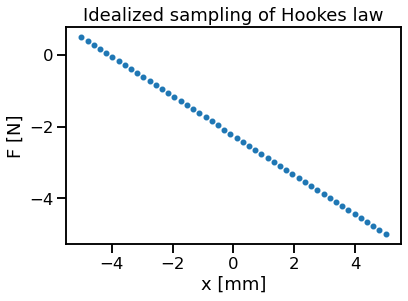

In [4]:
hooke_law_plot()

Bur the variables we encounter and want to explore relationships between:
- Never this simple.
- Noise from various sources.
- Unknown *random* factors beyond the two variables we are relating.

Yellowstone:
- Old Faithful Geyser
- Is time between an eruption related to duration of previous eruption?

<img src = "Images/old-faithful-geyser.jpg"  width = 600/>
<center><i>What goes on in the mind of a bison?</i></center>

A Pandas dataframe with the geyser data logged:

In [5]:
old_faithful_df.head()

,Eruption duration [sec],Waiting time [min]
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


See if there is an obvious relationship between the two quantities:
- Visualize with a scatter plot.

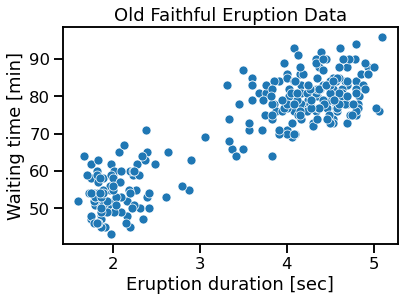

In [6]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'Eruption duration [sec]', y = 'Waiting time [min]', data = old_faithful_df, ax = ax)
ax.set_title('Old Faithful Eruption Data')
plt.show()

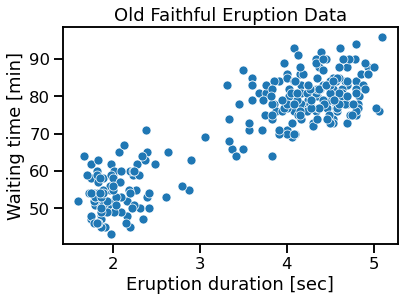

In [7]:
fig

You hear it. Don't you? It wants to be fit by a line.

*It needs to be fit by a line*

Do what the data asks of you.

In [8]:
%%capture eruption_regressed

fig, ax = plt.subplots()
sns.regplot(x = 'Eruption duration [sec]', y = 'Waiting time [min]', data = old_faithful_df,
            line_kws = {"color": "red", "linestyle": "--", "label": "Regression Line"}, ax = ax)
ax.legend()
ax.set_title('Old Faithful Eruption Data')
plt.show()

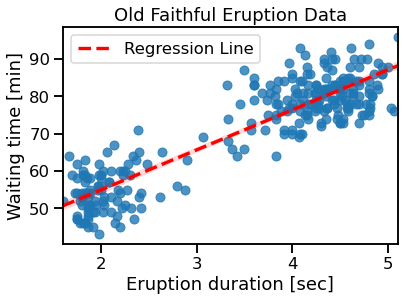

In [9]:
eruption_regressed()

Why useful?

- Establishes quantitative relation:
    - expected (average) value of waiting time **given** an eruption duration.
- Clearly allows *interpolation* where data is scarce


- Can aid us in *quantifying*  how strongly related two variables are given statistical fluctuations.

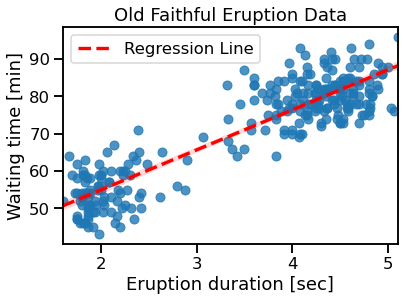

In [10]:
eruption_regressed()

At each $x_i$ (eruption duration):
- $y_i$ (waiting time) is better modeled by:

$$ y_i = \beta_1 x_i + \beta_0 + \epsilon_i$$

where $\epsilon_i$ is a random variable encapsulating unknown sources of variation.

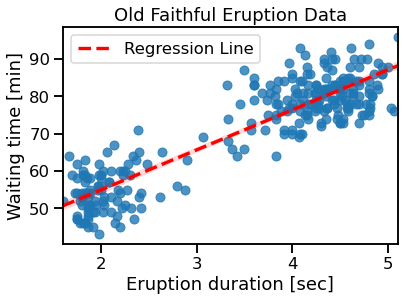

In [11]:
eruption_regressed()

Task of linear regression:
$$ y_i = \beta_1 x_i + \beta_0 + \epsilon_i$$
- i.e. each $y_i$ at given $x_i$ sampled from a  distribution generated by variation of $\epsilon_i$.

- find $\beta_1$, $\beta_0$: line that best accounts for $y$ given $x$ *on average*.
- i.e. averaged over noise $\epsilon_i$

<img src = "Images/regression_normal.png"  width = 500/>
<center><i>Line of means of $y$ given $x$</i></center>

- The line is a set of means:
    - of normal distributions for each $x_i$ (predictor)
    - best accounting for value/variation in outcome $y$ and its variation $\epsilon_i$.
    
Assumption: standard deviation across $x_i$ are all the same.

#### This is why it's called linear regression.
- The notion of central tendency to a line.

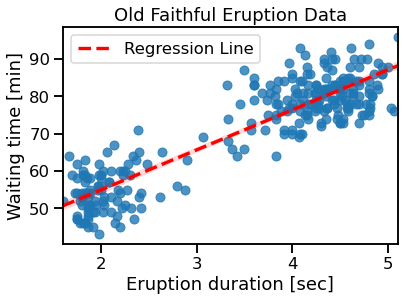

In [12]:
eruption_regressed()

Finding line of $y$ given $x$ that best accounts for variation of $y_i$ at each $x_i$ in our data

Seems like a hard problem in probability/statistics.

Turns out it's not that hard and is equivalent to:


Minimizing the square distance between our points and a best guess line:

$$ L = \frac{1}{2}\sum_i^N(y_i - \beta_1 x_i - \beta_0)^2$$
<center>OR</center>
$$ L = \frac{1}{2}\sum_i^N(y_i - \hat{y}_i)^2 = \frac{1}{2}\sum_i^N\epsilon_i^2 $$

Known as the sum squared error (SSE)

where:
- $\hat{y_i} = \beta_1 x_i + \beta_0 $ is best fit line (*estimator*) evaluated at $x_i$.
- $ (x_i, y_i) $ is our data (sample of N points)
- $ y_i = \beta_1 x_i + \beta_0 +\epsilon_i $

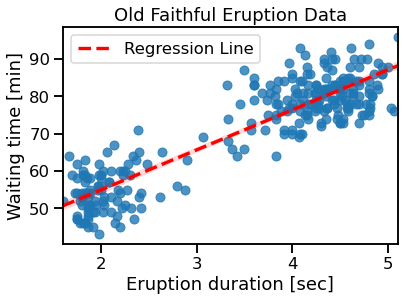

In [13]:
eruption_regressed()

$\hat{y_i} = \beta_1 x_i + \beta_0 $

Our task is to *learn* the slope $\beta_1$ and intercept $\beta_0$ from the data by minimizing the SSE:


The process of learning parameters of a given function from data:
- Known as **supervised learning** in machine learning jargon.
- Regression is thus a supervised learning task.

Find $\beta_1$, $ \beta_0 $ minimizing the loss function:
$$ L = \frac{1}{2}\sum_i^N(y_i - \beta_1 x_i - \beta_0)^2 $$ 

The values of $\beta_0$ and $\beta_1$ minimizing the squared loss:


$$\beta_0 = \bar{y} - \beta_1\bar{x} $$

<br>

<center> and </center>
</ br>
$$\beta_1 = \frac{\sum_{i=1}^{N}(x_i -\bar{x})(y_i -\bar{y})}{\sum_{i=1}^{N}(x_i -\bar{x})(x_i -\bar{x})} $$

Numerator of $\beta_1$:

$$ Cov(X,Y) = \frac{\sum_{i=1}^{N}(x_i -\bar{x})(y_i -\bar{y})}{N} $$

- Known as covariance of X and Y. 
- Measures the degree to which variation in Y is related to variation in X.


$$ Var(X) = \frac{\sum_{i=1}^{N}(x_i -\bar{x})(x_i -\bar{x})}{N}  $$

- Degree of variation in $X$

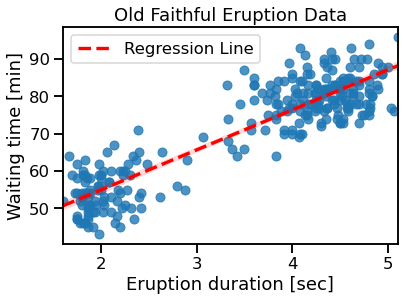

In [14]:
eruption_regressed()

The values of $\beta_0$ and $\beta_1$ minimizing the squared loss:


$$\beta_0 = \bar{y} - \beta_1\bar{x} $$

<br>

<center> and </center>
</ br>
$$\beta_1 = \frac{Cov(x,y)}{Var(x)}$$

$\beta_1$ is thus:
<br>
- measure of how related variations in y are to variations in x
- normalized by the variation scale in x

Let's calculate the best fit line parameters manually for the old faithful data:

In [15]:
x_samp = old_faithful_df['Eruption duration [sec]']
y_samp = old_faithful_df['Waiting time [min]']

beta_1 = np.cov(x_samp, y_samp)[0][1]/x_samp.var()
beta_0 = y_samp.mean() - beta_1*x_samp.mean()


In [16]:
np.cov(x_samp, y_samp)

array([[  1.30272833,  13.97780785],
       [ 13.97780785, 184.82331235]])

Estimator for slope based off data:

In [17]:
beta_1

10.729641395133521

Estimator for bias (constant) based off data:

In [18]:
beta_0

33.474397022753365

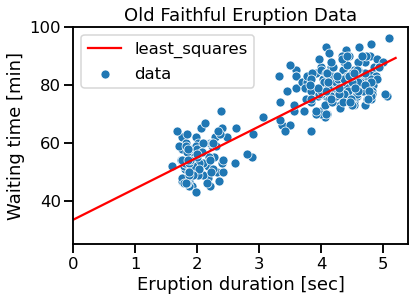

In [19]:

fig, ax = plt.subplots()
sns.scatterplot(x = 'Eruption duration [sec]', y = 'Waiting time [min]', data = old_faithful_df, ax = ax, label = 'data')

x_range = np.linspace(0, 5.2, 400)
y_estimator = beta_1*x_range + beta_0

ax.plot(x_range, y_estimator, c ='r', label = 'least_squares')

ax.legend()
ax.set_title('Old Faithful Eruption Data')
plt.xlim(0,5.4)
plt.ylim(25, 100)
plt.show()

#### Nice packages/frameworks to do this:
- statsmodels
- scikit-learn

Can also calculate a bunch of other parameters that are useful for analyzing quality of fits.

Import statsmodel's api package: contains linear regression functions.

In [20]:
import statsmodels.api as sm

Need to do this to x variable or statsmodel's won't fit the intercept (or bias):

In [21]:
X = sm.add_constant(x_samp) 

In [23]:
X

,const,Eruption duration [sec]
0,1.0,3.600
1,1.0,1.800
2,1.0,3.333
3,1.0,2.283
4,1.0,4.533
...,...,...
267,1.0,4.117
268,1.0,2.150
269,1.0,4.417
270,1.0,1.817


Fit the model given y and X: the data.

In [24]:
results = sm.OLS(y_samp, X).fit()

Results object has:
- attributes of the regression (coeffcients, etc) 
- nice methods for reporting results

Just getting the coefficients

In [25]:
results.params

const                      33.474397
Eruption duration [sec]    10.729641
dtype: float64

Groovy.

The .summary() method gives an overall report.

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Waiting time [min]   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 22 May 2023   Prob (F-statistic):          8.13e-100
Time:                        13:48:15   Log-Likelihood:                -868.38
No. Observations:                 272   AIC:                             1741.
Df Residuals:                     270   BIC:                             1748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      33.4744      1.155     28.985      0.000      31.201      35.748
Eruption duration [sec]    10.7296      0.315     34.089      0.000      10.110      11.349
==============================================================================
Omnibus:                        5.492   Durbin-Watson:                   2.543
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.683
Skew:                           0.237   Prob(JB):                       0.0962
Kurtosis:                       2.567   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A few relevant reporting numbers here:
- $R^2$: known as the coefficient of determination.
- p-values and t-statistics for each coefficient.

#### R^2 value

- A measure of goodness of fit.
- *But what is it?*

Our estimator for :
$$ \hat{y} = \beta_1 x + \beta_0 $$

Then:

$$ R^2 = 1 -  \frac{ \sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2} = \\ 1 -  \frac{RSS}{Var(Y)} $$ 

Its a measure of how much of the variance in Y our linear model explained beyond just using the mean.

- $R^2 = 1$:
    - variation in Y perfectly explained by variation in X
    - with fit parameters $\beta_1$ and $\beta_0$.
- $R^2 = 0$: 
    - might as well have used the mean of Y. 
    - i.e. X isn't really a good predictor of outcome Y.


- Practically speaking:
    - R^2 >= 0.7 shows X as a significant predictor.
    - But this threshold depends on the field.

Can also get R^2 directly from results:

In [23]:
results.rsquared

0.8114607609733097

#### Relation of $R^2$ to the Pearson correlation coefficient

Pearson correlation coefficient is a measure of how correlated one variable is with another.

Pearson correlation:

$$ r_{xy} = \frac{Cov(x,y)}{\sigma_x\sigma_y} = \frac{\sum_{i=1}^N \frac{(x_i-\bar{x})(y_i - \bar{y})}{N}}{\sigma_x\sigma_y} $$

- Relationship between fluctuations of $x$ and $y$
- normalized by scale for variations of  x and y if independent

With a little math one can show that:
- Pearson correlation $r_{xy}$ is just the square root of $R$^2.

One can calculate the Pearson correlation matrix easily in Pandas:

In [27]:
old_faithful_df.corr()

,Eruption duration [sec],Waiting time [min]
Eruption duration [sec],1.000000,0.900811
Waiting time [min],0.900811,1.000000


In [28]:
np.sqrt(results.rsquared)

0.900811168321813

Yup, I wasn't lying to you.

Let's take a look at some of the other report figures.

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Waiting time [min]   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          8.13e-100
Time:                        13:45:59   Log-Likelihood:                -868.38
No. Observations:                 272   AIC:                             1741.
Df Residuals:                     270   BIC:                             1748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      33.4744      1.155     28.985      0.000      31.201      35.748
Eruption duration [sec]    10.7296      0.315     34.089      0.000      10.110      11.349
==============================================================================
Omnibus:                        5.492   Durbin-Watson:                   2.543
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.683
Skew:                           0.237   Prob(JB):                       0.0962
Kurtosis:                       2.567   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are these p-value thingies?
- Estimate of how significantly different coefficient is from 0 (no effect)
- Null: coefficient is 0
- P < 0.05: reject null.

In [29]:
X_bad = np.linspace(-1,1,30)
y_bad = .1*X_bad +np.random.randn(30)

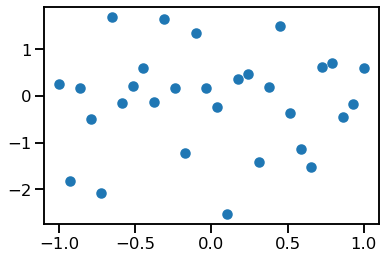

In [30]:
plt.scatter(X_bad, y_bad)

Fit this data

In [31]:
X_bad_aug = sm.add_constant(X_bad)
results_2 = sm.OLS(y_bad, X_bad_aug).fit()

In [33]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                   0.05108
Date:                Mon, 22 May 2023   Prob (F-statistic):              0.823
Time:                        14:06:56   Log-Likelihood:                -44.149
No. Observations:                  30   AIC:                             92.30
Df Residuals:                      28   BIC:                             95.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0966      0.199     -0.485      0.632      -0.505       0.311
x1             0.0754      0.334      0.226      0.823      -0.608       0.759
==============================================================================
Omnibus:                        1.023   Durbin-Watson:                   2.322
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                0.873
Skew:                          -0.393   Prob(JB):                        0.646
Kurtosis:                       2.714   Cond. No.                         1.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We cannot reject the null here for the slope coefficient.
- Slope is not significantly different from 0.
- Thus cannot reject the null that Y has no correlation with X.

Linear regression:
- often used in inference:
- testing whether Y or X have statistically significant correlation or not.
- p-values can tell us this.